In [ ]:
%%capture
%%pip install pafy youtube-dl moviepy 

In [4]:
# Standard Libraries
import sys # Import the sys module
%pip install opencv-python
%pip install pafy
%pip install matplotlib
%pip install tensorflow
%pip install scikit-learn
%pip install yt-dlp

# Uninstall and then reinstall moviepy to ensure a clean installation
%pip uninstall moviepy -y
%pip install moviepy==1.0.3

# Print the Python executable path and moviepy installation location
print(f"Python executable: {sys.executable}")
%pip show moviepy


import os
import math
import random
import datetime as dt
from collections import deque

# Video & Image Processing
import cv2
import pafy
import numpy as np

# Video Editing


# Visualization
import matplotlib.pyplot as plt
from moviepy.editor import *
# Machine Learning Tools
from sklearn.model_selection import train_test_split

# TensorFlow / Keras for Deep Learning
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.3 MB ? eta -:--:--
   ------ --------------------------------- 0.5/3.3 MB 1.7 MB/s eta 0:00:02
   --------- ------------------------------ 0.8/3.3 MB 1.6 MB/s eta 0:00:02
   ---------------- ----------------------- 1.3/3.3 MB 1.6 MB/s eta 0:00:02
   ------------------- -------------------- 1.6/3.3 MB 1.6 MB/s eta 0:00:02
   ---------------------- ----------------- 1.8/3.3 MB 1.7 MB/s eta 0:00:01
   ---------------------------- ----------- 2.4/3.3 MB 1.7 MB/s eta 0:00:01
   ----------------------------------- ---- 2.9/3.3 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 3.3/3.3 MB 1.8 MB/s e

In [5]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)
#  your program does the same thing every time you run it — especially when it comes to anything random.

In [6]:
%%capture
# Install dependencies
%pip install pafy youtube-dl moviepy

# Download UCF50 dataset
%wget --no-check-certificate https://www.crcv.ucf.edu/data/UCF50.rar

# Extract the dataset
%unar x UCF50.rar


<!-- data set info ## **<font style="color:rgb(134,19,348)">Step 1: Visualize the Data with its Labels</font>**

In the first step, we will visualize the data along with labels to get an idea about what we will be dealing with. We will be using the [UCF50 - Action Recognition Dataset](https://www.crcv.ucf.edu/data/UCF50.php), consisting of realistic videos taken from youtube which differentiates this data set from most of the other available action recognition data sets as they are not realistic and are staged by actors. The Dataset contains:

*   **`50`** Action Categories

*   **`25`** Groups of Videos per Action Category

*   **`133`** Average Videos per Action Category

*   **`199`** Average Number of Frames per Video

*   **`320`** Average Frames Width per Video

*   **`240`** Average Frames Height per Video

*   **`26`** Average Frames Per Seconds per Video

For visualization, we will pick `20` random categories from the dataset and a random video from each selected category and will visualize the first frame of the selected videos with their associated labels written. This way we’ll be able to visualize a subset ( `20` random videos ) of the dataset. -->


c:\Users\NANCY_SINGH\Desktop\project-human


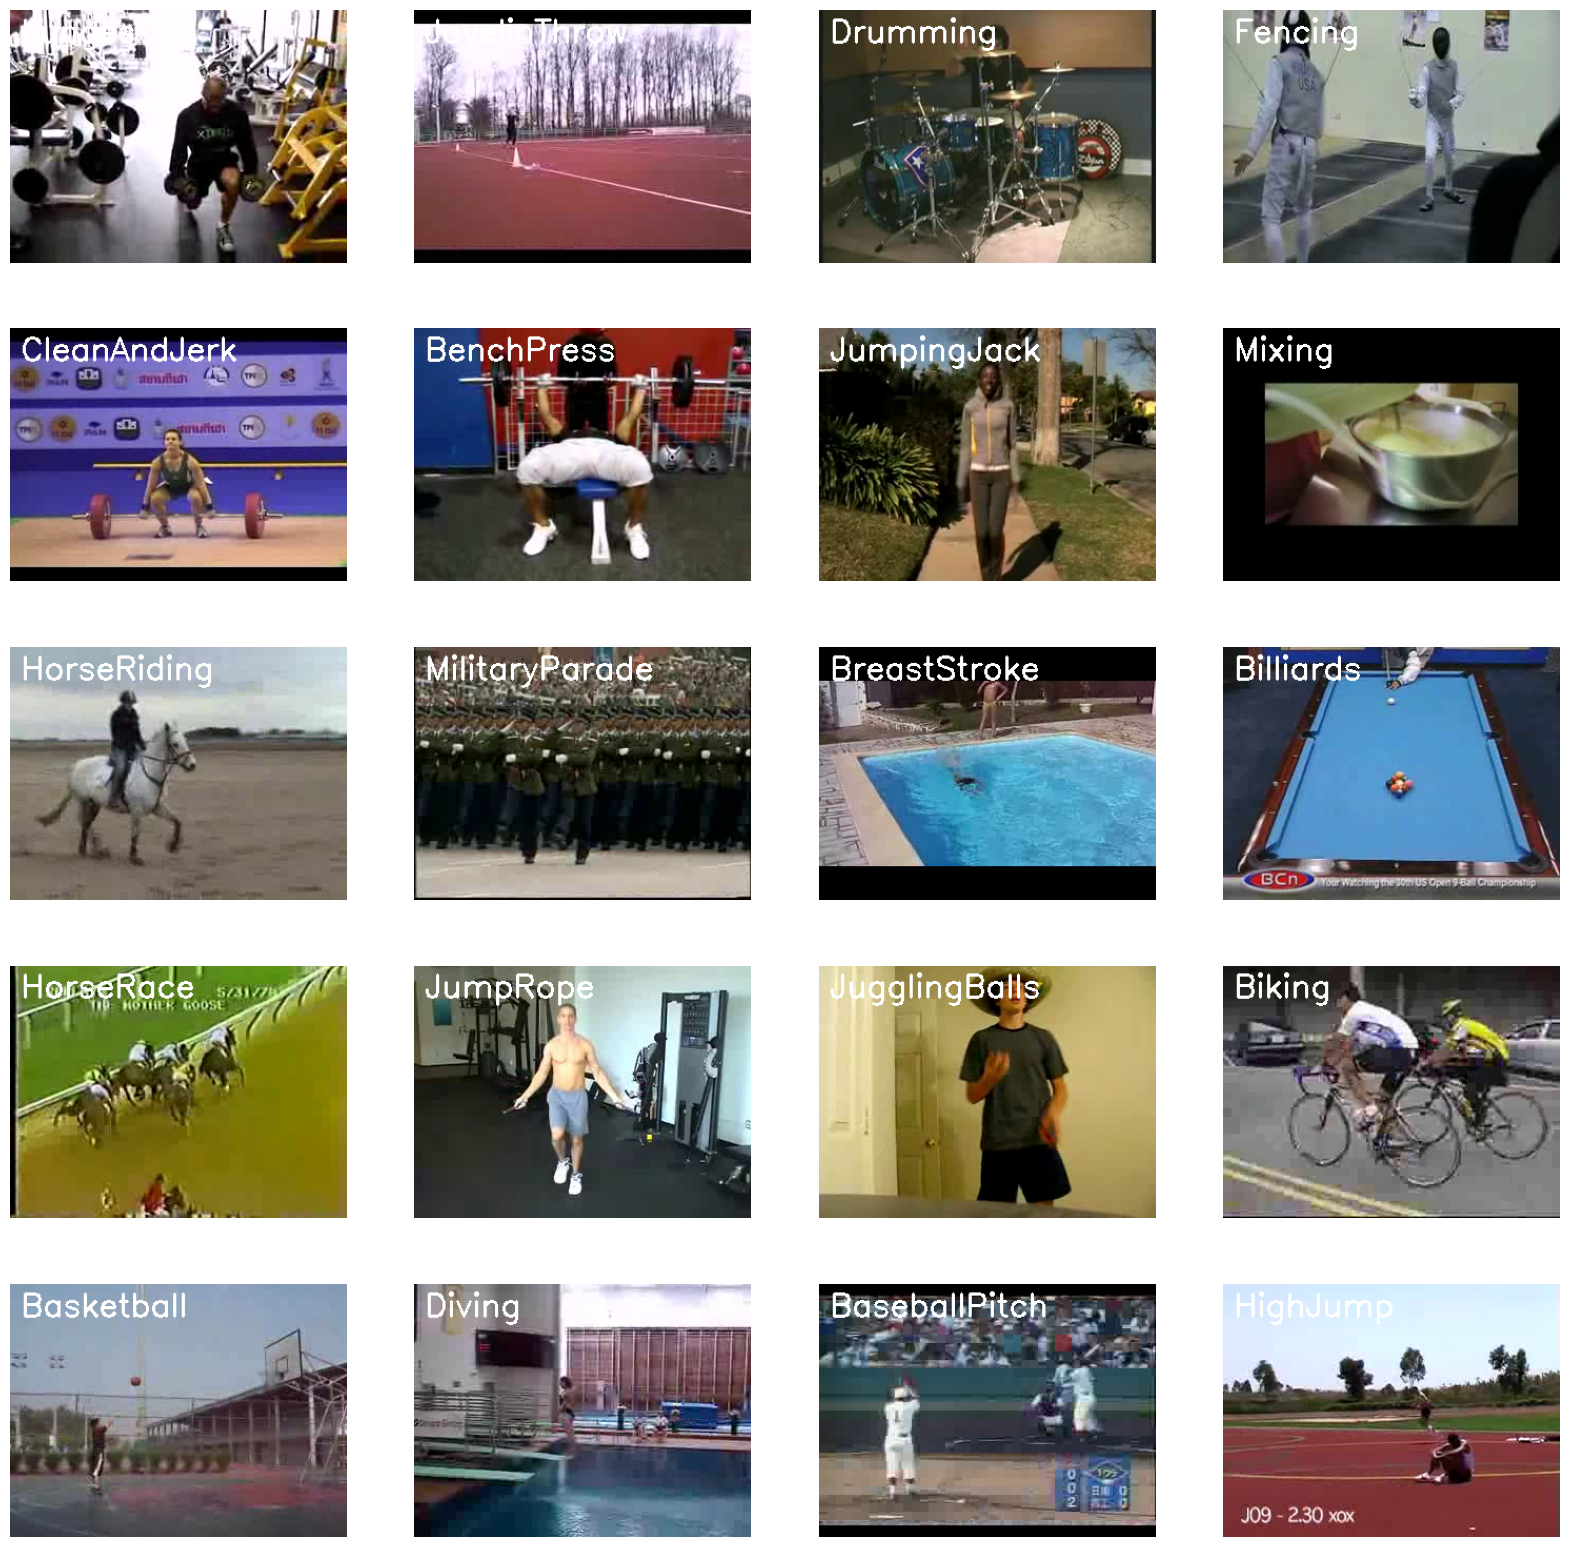

In [10]:
# Show random frames from 20 different action classes
import os
print(os.getcwd())
plt.figure(figsize = (20, 20))
all_classes_names = os.listdir('UCF50')
random_range = random.sample(range(len(all_classes_names)), 20)

for counter, random_index in enumerate(random_range, 1):
    selected_class_Name = all_classes_names[random_index]
    video_files_names_list = os.listdir(f'UCF50/{selected_class_Name}')
    selected_video_file_name = random.choice(video_files_names_list)
    video_reader = cv2.VideoCapture(f'UCF50/{selected_class_Name}/{selected_video_file_name}')
    _, bgr_frame = video_reader.read()
    video_reader.release()

    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')


<!-- PREPROCESS THE DATASET-->

In [ ]:
IMAGE_HEIGHT = 64
IMAGE_WIDTH = 64

SEQUENCE_LENGTH = 20
DATASET_DIR = 'UCF50'
CLASS_LIST = os.listdir(DATASET_DIR)[:20]
# CLASS_LIST.sort()  # Sort the class names for consistency

NameError: name 'os' is not defined

In [25]:
# function that frame_extract and normilized the frames
def frames_extraction(video_path):
    '''
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
    Returns:
        frames_list: A list containing the resized and normalized frames of the video.
    '''

    # Declare a list to store video frames.
    frames_list = []
    
    
    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading the frame from the video. 
        success, frame = video_reader.read() 

        # Check if Video frame is not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        
        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)
    
    # Release the VideoCapture object. 
    video_reader.release()

    # Return the frames list.
    return frames_list

In [26]:
# dataset creation
def create_dataset():
    '''
    This function will extract the data of the selected classes and create the required dataset.
    Returns:
        features:          A list containing the extracted frames of the videos.
        labels:            A list containing the indexes of the classes associated with the videos.
        video_files_paths: A list containing the paths of the videos in the disk.
    '''

    # Declared Empty Lists to store the features, labels and video file path values.
    features = []
    labels = []
    video_files_paths = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(CLASS_LIST):
        
        # Display the name of the class whose data is being extracted.
        print(f'Extracting Data of Class: {class_name}')
        
        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        
        # Iterate through all the files present in the files list.
        for file_name in files_list:
            
            # Get the complete video path.
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            # Extract the frames of the video file.
            frames = frames_extraction(video_file_path)

            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
            # So ignore the vides having frames less than the SEQUENCE_LENGTH.
            if len(frames) ==SEQUENCE_LENGTH:

                # Append the data to their repective lists.
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  
    
    # Return the frames, class index, and video file path.
    return features, labels, video_files_paths


In [27]:
# dataset create
features, labels, video_files_paths = create_dataset()


Extracting Data of Class: BaseballPitch
Extracting Data of Class: Basketball
Extracting Data of Class: BenchPress
Extracting Data of Class: Biking
Extracting Data of Class: Billiards
Extracting Data of Class: BreastStroke
Extracting Data of Class: CleanAndJerk
Extracting Data of Class: Diving
Extracting Data of Class: Drumming
Extracting Data of Class: Fencing
Extracting Data of Class: GolfSwing
Extracting Data of Class: HighJump
Extracting Data of Class: HorseRace
Extracting Data of Class: HorseRiding
Extracting Data of Class: HulaHoop
Extracting Data of Class: JavelinThrow
Extracting Data of Class: JugglingBalls
Extracting Data of Class: JumpingJack
Extracting Data of Class: JumpRope
Extracting Data of Class: Kayaking


In [29]:
print(features)

[[[[[0.4745098  0.51372549 0.48235294]
    [0.23137255 0.23137255 0.20784314]
    [0.36470588 0.40392157 0.37254902]
    ...
    [0.98431373 0.98431373 0.98431373]
    [0.98431373 0.98431373 0.98431373]
    [0.98431373 0.98431373 0.98431373]]

   [[0.62352941 0.6627451  0.63137255]
    [0.28235294 0.30588235 0.2745098 ]
    [0.75294118 0.78823529 0.76078431]
    ...
    [0.98431373 0.98431373 0.98431373]
    [0.98431373 0.98431373 0.98431373]
    [0.98431373 0.98431373 0.98431373]]

   [[0.14901961 0.17647059 0.14901961]
    [0.41568627 0.45490196 0.42352941]
    [0.94509804 0.97254902 0.94509804]
    ...
    [0.98431373 0.98431373 0.98431373]
    [0.98431373 0.98431373 0.98431373]
    [0.98431373 0.98431373 0.98431373]]

   ...

   [[0.27058824 0.38431373 0.36862745]
    [0.27058824 0.38431373 0.36862745]
    [0.3254902  0.43921569 0.42352941]
    ...
    [0.1372549  0.30196078 0.20784314]
    [0.14901961 0.29019608 0.21568627]
    [0.20784314 0.3254902  0.27058824]]

   [[0.25098039 

In [ ]:
one_hot_labels = to_categorical(labels, num_classes=len(CLASS_LIST))

In [38]:
# SPLIT
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_labels, test_size=0.25, random_state=seed_constant)


In [39]:
print(f'Features Shape: {features.shape}')
print(f'Labels Shape: {labels.shape}')
print(f'Features Train Shape: {features_train.shape}')
print(f'Labels Train Shape: {labels_train.shape}')
print(f'Features Test Shape: {features_test.shape}')    

Features Shape: (2761, 20, 64, 64, 3)
Labels Shape: (2761,)
Features Train Shape: (2070, 20, 64, 64, 3)
Labels Train Shape: (2070, 20)
Features Test Shape: (691, 20, 64, 64, 3)


In [ ]:
# implementing the Convlstm -->3d input
# implemtning the ConvLSTM2D model


In [61]:
def create_LRCN_model():
    '''
    This function will construct the required LRCN model.
    Returns:
        model: It is the required constructed LRCN model.
    '''

    # We will use a Sequential model for model construction.
    model = Sequential()
    
    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(TimeDistributed(MaxPooling2D((4, 4)))) 
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    #model.add(TimeDistributed(Dropout(0.25)))
                                      
    model.add(TimeDistributed(Flatten()))
                                      
    model.add(LSTM(32))
                                      
    model.add(Dense(len(CLASS_LIST), activation = 'softmax'))

    ########################################################################################################################

    # Display the models summary.
    model.summary()
    
    # Return the constructed LRCN model.
    return model

In [62]:
LRCN_model=create_LRCN_model()

print("model created successfully")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_33             │ (None, 20, 64, 64, 16) │           448 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_34             │ (None, 20, 16, 16, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_35             │ (None, 20, 16, 16, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_36             │ (None, 20, 16, 16, 32) │         4,640 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_37             │ (None, 20, 4, 4, 32)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_38             │ (None, 20, 4, 4, 32)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_39             │ (None, 20, 4, 4, 64)   │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_40             │ (None, 20, 2, 2, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_41             │ (None, 20, 2, 2, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_42             │ (None, 20, 2, 2, 64)   │        36,928 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_43             │ (None, 20, 1, 1, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_44             │ (None, 20, 64)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,588 (287.45 KB)

 Trainable params: 73,588 (287.45 KB)

 Non-trainable params: 0 (0.00 B)

model created successfully


In [63]:
%pip install pydot

In [64]:
plot_model(LRCN_model, to_file='LRCN_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [67]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define early stopping properly
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=15,
    mode='min',
    restore_best_weights=True
)

# Compile the model
LRCN_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
LRCN_model_training_history = LRCN_model.fit(
    x=features_train,
    y=labels_train,
    epochs=70,
    batch_size=20,
    shuffle=True,  # Correct spelling
    validation_data=(features_test, labels_test),
    callbacks=[early_stopping_callback]
)


Epoch 1/70
104/104 ━━━━━━━━━━━━━━━━━━━━ 133s 981ms/step - accuracy: 0.0786 - loss: 2.9799 - val_accuracy: 0.1650 - val_loss: 2.7029
Epoch 2/70
104/104 ━━━━━━━━━━━━━━━━━━━━ 89s 848ms/step - accuracy: 0.2085 - loss: 2.5876 - val_accuracy: 0.2793 - val_loss: 2.3322
Epoch 3/70
104/104 ━━━━━━━━━━━━━━━━━━━━ 78s 745ms/step - accuracy: 0.2849 - loss: 2.2761 - val_accuracy: 0.3010 - val_loss: 2.1562
Epoch 4/70
104/104 ━━━━━━━━━━━━━━━━━━━━ 102s 977ms/step - accuracy: 0.3754 - loss: 2.0207 - val_accuracy: 0.3777 - val_loss: 2.0155
Epoch 5/70
104/104 ━━━━━━━━━━━━━━━━━━━━ 82s 782ms/step - accuracy: 0.3984 - loss: 1.9110 - val_accuracy: 0.3821 - val_loss: 1.9424
Epoch 6/70
104/104 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.4716 - loss: 1.6980 - val_accuracy: 0.4486 - val_loss: 1.7967
Epoch 7/70
104/104 ━━━━━━━━━━━━━━━━━━━━ 84s 804ms/step - accuracy: 0.5053 - loss: 1.6191 - val_accuracy: 0.4906 - val_loss: 1.6715
Epoch 8/70
104/104 ━━━━━━━━━━━━━━━━━━━━ 82s 790ms/step - accuracy: 0.5581 - loss: 1

In [70]:
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9321 - loss: 0.3622


In [71]:
# Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
    
# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f'LRCN_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Save the Model.
LRCN_model.save("model1.h5")

In [69]:

def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation 
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''
    
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

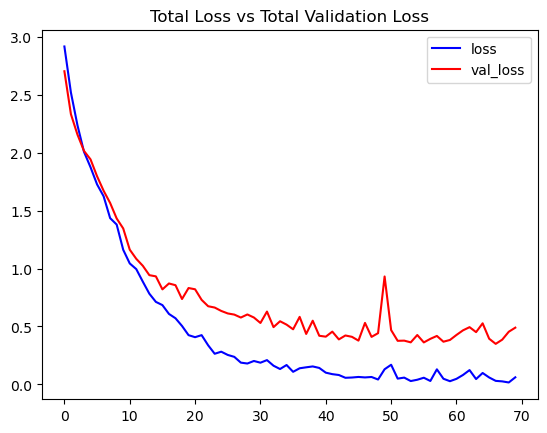

In [73]:
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

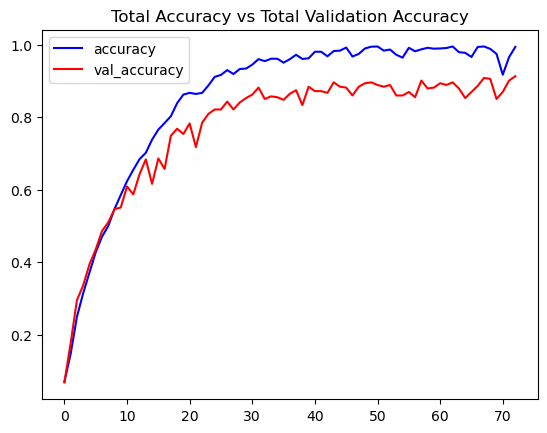

In [54]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [79]:
%pip install pytube


In [85]:
%pip install --upgrade pytube


Note: you may need to restart the kernel to use updated packages.


In [91]:
def download_youtube_videos(youtube_video_url, output_directory):
     '''
    This function downloads the youtube video whose URL is passed to it as an argument.
    Args:
        youtube_video_url: URL of the video that is required to be downloaded.
        output_directory:  The directory path to which the video needs to be stored after downloading.
    Returns:
        title: The title of the downloaded youtube video.
    '''
 
     # Create a video object which contains useful information about the video.
     video = pafy.new(youtube_video_url)
 
     # Retrieve the title of the video.
     title = video.title
 
     # Get the best available quality object for the video.
     video_best = video.getbest()
 
     # Construct the output file path.
     output_file_path = f'{output_directory}/{title}.mp4'
 
     # Download the youtube video at the best available quality and store it to the contructed path.
     video_best.download(filepath = output_file_path, quiet = True)
 
     # Return the video title.
     return title

In [93]:
# Make the Output directory if it does not exist
test_videos_directory = 'test_videos'
os.makedirs(test_videos_directory, exist_ok = True)

# Download a YouTube Video.
video_title = download_youtube_videos('https://www.youtube.com/watch?v=8u0qjmHIOcE', test_videos_directory)

# Get the YouTube Video's path we just downloaded.
input_video_file_path = f'{test_videos_directory}/{video_title}.mp4'

AttributeError: 'NoneType' object has no attribute 'group'